#Secom: fabricação de semicondutores

---
1) Carregar base de Dados

In [45]:
# Importação dos pacotes
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns

# Seed para reprodução de resultados
seed = 1
random.seed(seed)
np.random.seed(seed)

In [46]:
random.uniform(0,1)

0.13436424411240122

Para entendermos o uso da seed (semente), ele nos permite gerar o mesmo resultado independente da quantidade de vezes que estamos rodando o código para que possamos ter sempre o mesmo resultado e facilitar a revisão do código. Se não tivéssemos declarado o seed = 1, toda que vez que rodássemos o código, ele geraria valores aleatórios no random diferente, o que iria fazer com que cada hora, tivéssemos um resultado diferente.

Muito utilizado para a aleatoriedade, treinamento do modelo, testes etc.

In [47]:
data = pd.read_csv('/Users/leonardocosta/PycharmProjects/PUC_MBA_AI/Data_Mining/Secom.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,590
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN,-1
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045,-1
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602,1
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432,-1
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432,-1


In [48]:
data.shape

(1567, 591)

In [49]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,590
count,1561.000000,1560.000000,1553.000000,1553.000000,1553.000000,1553.0,1553.000000,1558.000000,1565.000000,1565.000000,...,618.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1566.000000,1567.000000
mean,3014.452896,2495.850231,2200.547318,1396.376627,4.197013,100.0,101.112908,0.121822,1.462862,-0.000841,...,97.934373,0.500096,0.015318,0.003847,3.067826,0.021458,0.016475,0.005283,99.670066,-0.867262
std,73.621787,80.407705,29.513152,441.691640,56.355540,0.0,6.237214,0.008961,0.073897,0.015116,...,87.520966,0.003404,0.017180,0.003720,3.578033,0.012358,0.008808,0.002867,93.891919,0.498010
min,2743.240000,2158.750000,2060.660000,0.000000,0.681500,100.0,82.131100,0.000000,1.191000,-0.053400,...,0.000000,0.477800,0.006000,0.001700,1.197500,-0.016900,0.003200,0.001000,0.000000,-1.000000
25%,2966.260000,2452.247500,2181.044400,1081.875800,1.017700,100.0,97.920000,0.121100,1.411200,-0.010800,...,46.184900,0.497900,0.011600,0.003100,2.306500,0.013425,0.010600,0.003300,44.368600,-1.000000
50%,3011.490000,2499.405000,2201.066700,1285.214400,1.316800,100.0,101.512200,0.122400,1.461600,-0.001300,...,72.288900,0.500200,0.013800,0.003600,2.757650,0.020500,0.014800,0.004600,71.900500,-1.000000
75%,3056.650000,2538.822500,2218.055500,1591.223500,1.525700,100.0,104.586700,0.123800,1.516900,0.008400,...,116.539150,0.502375,0.016500,0.004100,3.295175,0.027600,0.020300,0.006400,114.749700,-1.000000
max,3356.350000,2846.440000,2315.266700,3715.041700,1114.536600,100.0,129.252200,0.128600,1.656400,0.074900,...,737.304800,0.509800,0.476600,0.104500,99.303200,0.102800,0.079900,0.028600,737.304800,1.000000


---
2) Separar input e output

In [50]:
# output 
y_train = data[590]
y_train.head()

0   -1
1   -1
2    1
3   -1
4   -1
Name: 590, dtype: int64

In [51]:
# input 
X_train = data.iloc[:, 0:590] # todas as linhas e colunas da 0 até 589 (a 590 não entra)
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,580,581,582,583,584,585,586,587,588,589
0,3030.93,2564.00,2187.7333,1411.1265,1.3602,100.0,97.6133,0.1242,1.5005,0.0162,...,NaN,NaN,0.5005,0.0118,0.0035,2.3630,NaN,NaN,NaN,NaN
1,3095.78,2465.14,2230.4222,1463.6606,0.8294,100.0,102.3433,0.1247,1.4966,-0.0005,...,0.0060,208.2045,0.5019,0.0223,0.0055,4.4447,0.0096,0.0201,0.0060,208.2045
2,2932.61,2559.94,2186.4111,1698.0172,1.5102,100.0,95.4878,0.1241,1.4436,0.0041,...,0.0148,82.8602,0.4958,0.0157,0.0039,3.1745,0.0584,0.0484,0.0148,82.8602
3,2988.72,2479.90,2199.0333,909.7926,1.3204,100.0,104.2367,0.1217,1.4882,-0.0124,...,0.0044,73.8432,0.4990,0.0103,0.0025,2.0544,0.0202,0.0149,0.0044,73.8432
4,3032.24,2502.87,2233.3667,1326.5200,1.5334,100.0,100.3967,0.1235,1.5031,-0.0031,...,NaN,NaN,0.4800,0.4766,0.1045,99.3032,0.0202,0.0149,0.0044,73.8432


---
3) Pré Processamento

---
3.1) Missing

Vamos utilizar a biblioteca missingno abaixo para gerar uma análise visual dos valores preenchidos por linhas e colunas

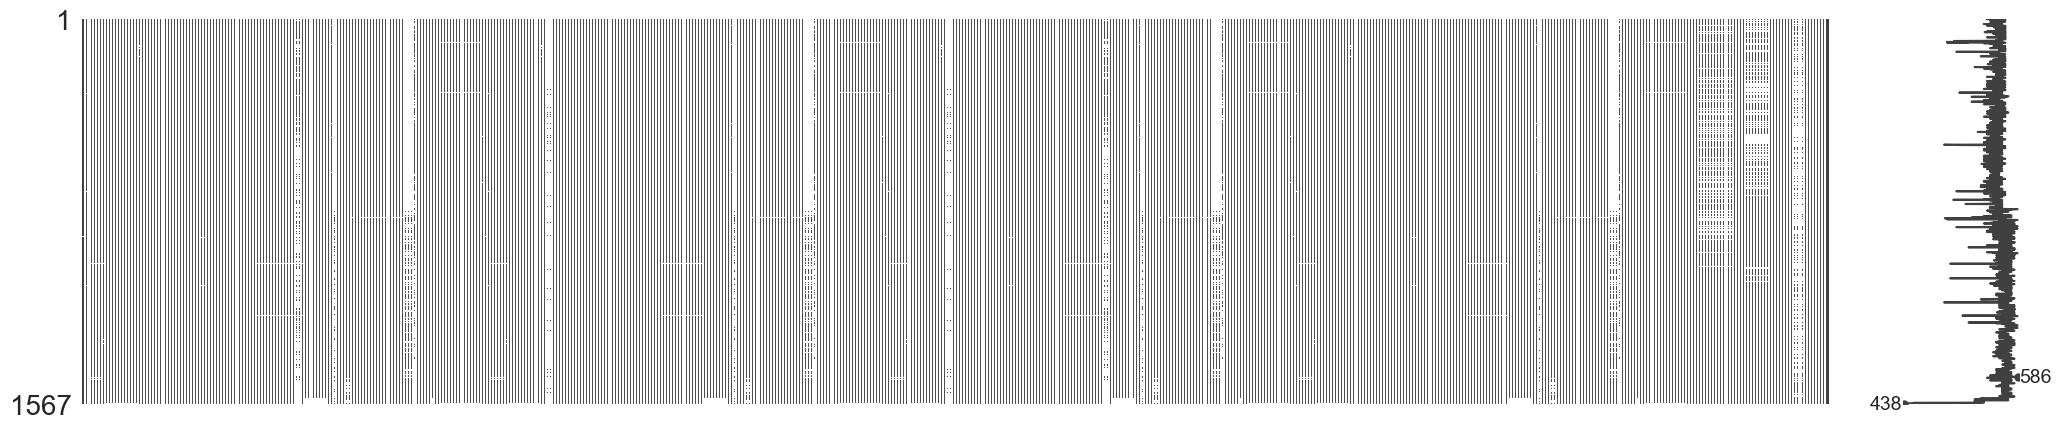

In [52]:
# Visualizar missing
import missingno as msno
msno.matrix(X_train, figsize=(25,5));

Podemos observar os traços brancos que tem muito missing e os traços pretos representam os valores. Tem colunas que pode fazer sentido deletar, pois temos poucos valores preenchidos. No gráfico lateral, a linha que possui mais valores preenchidos é a de 586 onde se aproxima do valor total, e a linha que possui menos valores preenchidos, é a 436.

Vamos verificar o missing por linha

In [53]:
# Verificar missing por linha. Vamos fazer a função abaixo etapa por etapa

# 1) Vamos pegar a primeira linha


# 2) Vamos contar quantos nulos tem nessa linha



# 3) Código completo
# Verificar quantos nulos temos por linha e somar eles e multiplicar por 100 para achar o percentual de missing para cada linha.
# Quantos nulos temos em cada linha, somar todos eles, multiplicar por 100 e dividir pelo tamanho da base de treino.
percent_missing_rows = X_train.apply(lambda x: x.isnull().sum() * 100 / len(X_train), axis=1).sort_values(ascending=False)
percent_missing_rows

# Valores abaixo estão em percentuais

1566    9.700064
1564    9.444799
1561    8.934269
1152    6.381621
511     6.381621
          ...   
773     0.255265
1455    0.255265
843     0.255265
1208    0.255265
952     0.255265
Length: 1567, dtype: float64

In [54]:
# Vamos criar um datafram com esses dados
df = pd.DataFrame({'row_index': X_train.index, 'percent_missing': percent_missing_rows})
df.head()

,row_index,percent_missing
1566,0,9.700064
1564,1,9.444799
1561,2,8.934269
1152,3,6.381621
511,4,6.381621


In [55]:
percent_missing = X_train.apply(lambda x: x.isnull().sum() * 100 / len(X_train), 
                                axis=0).sort_values(ascending=False)
df = pd.DataFrame({'column_name': X_train.columns, 'percent_missing': percent_missing})
df.head(35)

,column_name,percent_missing
157,0,91.193363
292,1,91.193363
293,2,91.193363
158,3,91.193363
492,4,85.577537
358,5,85.577537
85,6,85.577537
220,7,85.577537
246,8,64.964901
109,9,64.964901


In [56]:
# Classe tem missing?
y_train.isnull().sum()

0

In [57]:
# Atributos com muitos missing: serão deletados.
att_to_delete = df[0:32].index.values
att_to_delete

array([157, 292, 293, 158, 492, 358,  85, 220, 246, 109, 110, 111, 518,
       516, 245, 244, 382, 383, 384, 517, 578, 579, 580, 581, 346,  73,
        72, 345, 112, 247, 385, 519])

In [58]:
# deletar atributos
X_train.drop(att_to_delete, axis=1, inplace=True)
X_train.shape

(1567, 558)

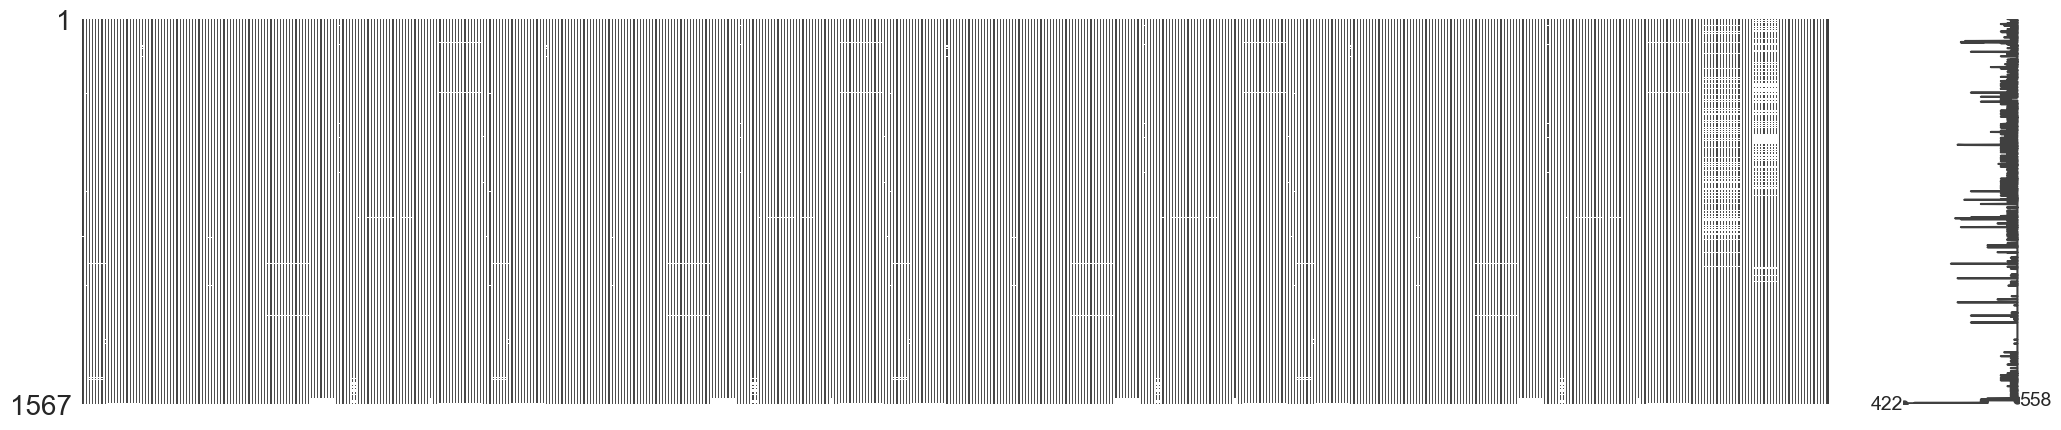

In [59]:
# visualizar novamente os missing
msno.matrix(X_train, figsize=(25,5));

In [60]:
# Imputar dados faltantes utilizando a mediana. Testar também o KNNImputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median").fit(X_train)
X_train = imputer.transform(X_train)

In [61]:
# Verificar se temos mais algum missing
print(np.isnan(X_train).sum())

0


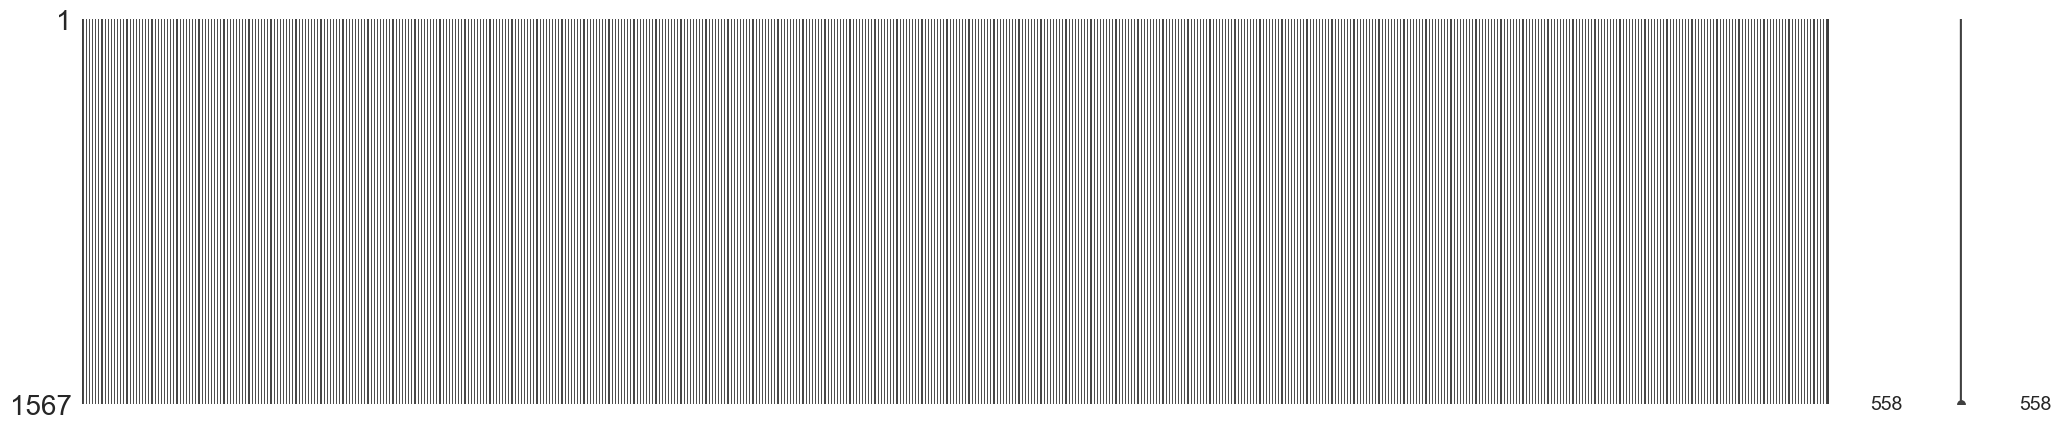

In [62]:
# visualizar novamente os missing
msno.matrix(pd.DataFrame(X_train), figsize=(25,5));

In [63]:
# remover colunas com variância zero
from sklearn.feature_selection import VarianceThreshold
zero_var_filter = VarianceThreshold()
X_train = zero_var_filter.fit_transform(X_train)

# OU
# zero_var_filter = zero_var_filter.fit(X_train)
# X_train = zero_var_filter.transform(X_train)

In [64]:
# colunas com variância zero
(zero_var_filter.variances_ == 0).sum()

116

In [65]:
# novo shape
pd.DataFrame(X_train).shape

(1567, 442)

##Machine Learning

In [66]:
# treinar modelo
from sklearn.svm import LinearSVC

def trainSVM(X_train, y_train, seed):
  model = LinearSVC(max_iter=20_000, random_state=seed)
  model.fit(X_train, y_train)
  return model

model = trainSVM(X_train, y_train, seed)

/Users/leonardocosta/PycharmProjects/PUC_MBA_AI/venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Entrega o resultado, mas reparem que a otimização não convergiu. Alguns motivos nos levam à isso:
1. Dados não normalizados
2. Número de iterações baixo
3. Valores dos hiperparâmetros do modelo (cada modelo tem o seu hiperparâmetro)
4. Modelo não adequado

1. Bases diferentes de comparação. Exemplo: valores em escalas diferentes, uns em metros/km outros em metros/quadrados etc.
2. Não teve tempo o suficiente para a otimização convergir para um erro mínimo. Tentamos aumentar mas não adiantou
3. Os hiperparâmetros do modelo podem não estar ajustados para o nossso modelo. Existem algumas formas de tunarmos os hiperparâmetros do modelo(tuning de hiperparâmetros). Mas quais são esses hiperparâmetros? depende do modelo. O modelo SVM por exemplo, tem alguns hiperparâmetros como: custo, gama, a função kernel (se a função é polinomial, oo grau do polinômio), se for uma rede neural, a quantidade de neurônios, função de ativação, taxa de aprendizado, quantidade de camadas de neurônios.
4. o modelo pode não ser adequado,

---
5) Avaliar modelo treinado na base de teste

In [67]:
# Carregar base de teste
test = pd.read_csv('Secom_teste.csv', header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,581,582,583,584,585,586,587,588,589,590
0,2940.50,2441.61,2205.2889,1630.3112,1.2733,100,98.8056,0.1218,1.3580,-0.0024,...,61.6014,0.4981,0.0143,0.0038,2.8760,0.0334,0.0206,0.0067,61.6014,-1
1,3065.36,2162.87,2211.3889,1763.4015,1.6569,100,101.9133,0.1212,1.5337,-0.0010,...,44.1754,0.5005,0.0163,0.0039,3.2621,0.0279,0.0123,0.0045,44.1754,-1
2,3038.21,2521.84,2273.7556,1549.8407,1.4105,100,105.0467,0.1171,1.3666,-0.0154,...,NaN,0.4968,0.0126,0.0029,2.5302,0.0279,0.0123,0.0045,44.1754,1
3,2912.76,2480.54,2233.7666,1772.4931,0.9501,100,100.7256,0.1215,1.4029,0.0174,...,170.5841,0.5040,0.0161,0.0043,3.1870,0.0095,0.0162,0.0063,170.5841,-1
4,3091.71,2548.95,2233.7666,1772.4931,0.9501,100,100.7256,0.1215,1.5210,0.0075,...,51.9199,0.5054,0.0127,0.0033,2.5175,0.0315,0.0164,0.0058,51.9199,-1


In [68]:
test.shape

(213, 591)

In [69]:
# Separar input e output.
X_test = test.iloc[:,0:590]
y_test = test[590]

In [70]:
# Remover as mesmas colunas removidas do treino (com muitos valores faltantes). Ambas as bases precisam ter a mesma quantidade de colunas
X_test.drop(att_to_delete, axis=1, inplace=True)

# Aplicar tratamento de Missing
X_test = imputer.transform(X_test)

# remover as mesmas colunas removidas por variância zero
X_test = zero_var_filter.transform(X_test)

X_test.shape # deve ser o mesmo que o treino (quantidade de linhas e colunas)

(213, 442)

Replicamos acima, todas as etapas de pré processamento do treino, no teste. Agora, iremos definir uma função para fazer a inferência no modelo e avalia o modelo

In [71]:
def predict_and_evaluate(model, X_test, y_test):

  y_pred = model.predict(X_test) # inferência do teste. Essa função parte do modelo treinado e passamos a base input para inferir.

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_pred, y_test)

  # Gerar um gráfico para facilitar a visualizacão
  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f") # queremos só valores inteiros, poir isso colocamos o fmt
  plt.xlabel('Real')
  plt.ylabel('Previsto')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(['OK', 'Defeito']) 
  ax.yaxis.set_ticklabels(['OK', 'Defeito'])
  plt.show()

Acurácia:  0.9436619718309859
Kappa:  0.22262773722627738


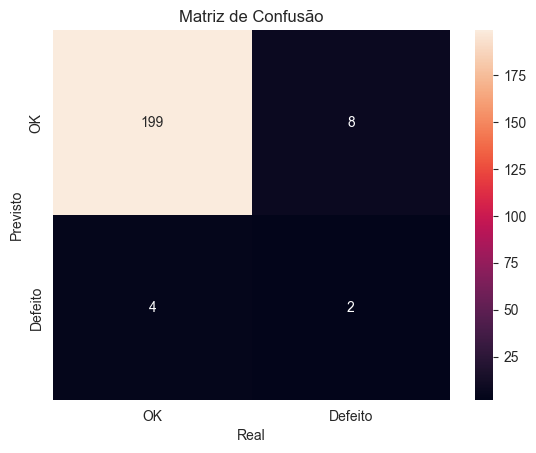

In [72]:
predict_and_evaluate(model, X_test, y_test)

Cabe ressaltar que a acurácia não significa muita coisa principalmente em bases desbalanceadas, como é o caso acima. Pela análise do Kappa, podemos perceber isso.
Observe que na segunda coluna de defeitos, dos 10 que estavam com defeitos, 2 foram classificados como com defeitos e 8 foram classificados como ok (80% dessa coluna está como OK quando deveria ser a maior proporção em Defeito). Por isso, o Kappa deu tão alto e a acurácia tão alta, pois os defeitos (2) foram a minoria.

---
5) Balancear

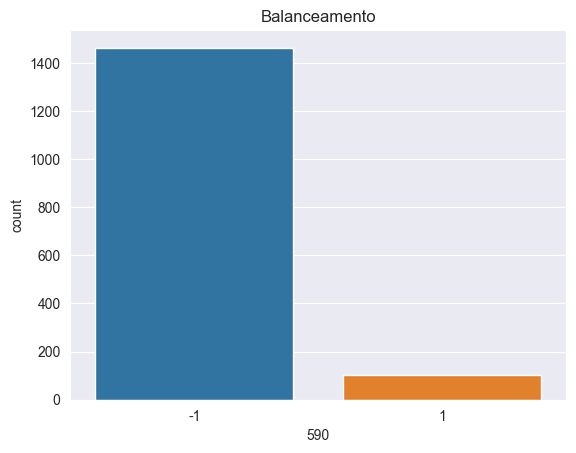

590
-1    1463
 1     104
Name: count, dtype: int64


In [73]:
# Balanceamento
sns.countplot(data=pd.DataFrame(X_train), x=y_train)
plt.title('Balanceamento')
plt.show()
print(y_train.value_counts())

Colocamos abaixo, uma biblioteca que faz o balanceamento, caso desejamos usar

In [74]:
# https://github.com/scikit-learn-contrib/imbalanced-learn
# !pip install -U imbalanced-learn
# from imblearn.under_sampling import RandomUnderSampler
# sampler = RandomUnderSampler(random_state=seed);
# X_train, y_train = sampler.fit_resample(X_train, y_train)

# Usar a biblioteca acima é uma opção, mas não conseguimos configurar o sampling. No caso do undersampling, ele sempre reduzirá a classe majoritária para o tamanho da minoritária...
# Essa biblioteca tem diversos outros métodos para balanceamento.

In [75]:
y_train.value_counts()

590
-1    1463
 1     104
Name: count, dtype: int64

In [76]:
# Undersampling aleatório
train_data = np.column_stack((X_train,y_train))
np.random.shuffle(train_data) # misturando as linhas de forma aleatória (misturando a base)

ok = train_data[train_data[:,442] == -1,:] # lista de registros sem falhas
defeito = train_data[train_data[:,442] == 1, :] # listas de registros com falhas

ok = ok[:1200] # pegamos na mão 1200 registros apenas, dos 1463

train_data = np.concatenate((ok, defeito))
np.random.shuffle(train_data)
train_data.shape

(1304, 443)

In [77]:
# Separar input e output
X_train = train_data[:,0:442]
y_train = train_data[:,442]

In [78]:
pd.DataFrame(y_train).value_counts()

-1.0    1200
 1.0     104
Name: count, dtype: int64

Observe acima que temos 1200 registros na classe majoritária e 104 na classe minoritária

/Users/leonardocosta/PycharmProjects/PUC_MBA_AI/venv/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Acurácia:  0.9624413145539906
Kappa:  0.32273449920508734


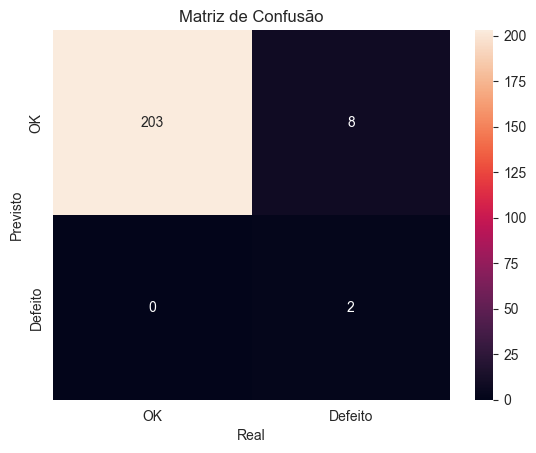

In [79]:
# treinar e avaliar o modelo
model = trainSVM(X_train, y_train, seed) # treino o modelo balanceado
predict_and_evaluate(model, X_test, y_test) # passamos o modelo treinado e a base de teste que queremos avaliar

Observe acima que o modelo ainda continua apresentando um problema de convergência, pois não normalizamos os dados. Vamos normalizar. Essa etapa de normalização é idealmente que se faça antes do balanceamento.

---
6) Normalizar

Temos o min max scaler: faz uma normalizacao dentro de um intervalo. Ele shifta o intervalo dos seus dados. Temos por exemplo os nossos dados em um intervalo de 1 a 10, ele coloca o os valores entre 0 e 1. O que é 5 vai para 0.5, o que é 10 vai para 0.1 etc. Mas proporcionalmente a diferença entre eles é a mesma
o StandardScaler é o z-score

In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

o balanceamento fazemos na base de treino apenas.

Acurácia:  0.9859154929577465
Kappa:  0.8622547962923044


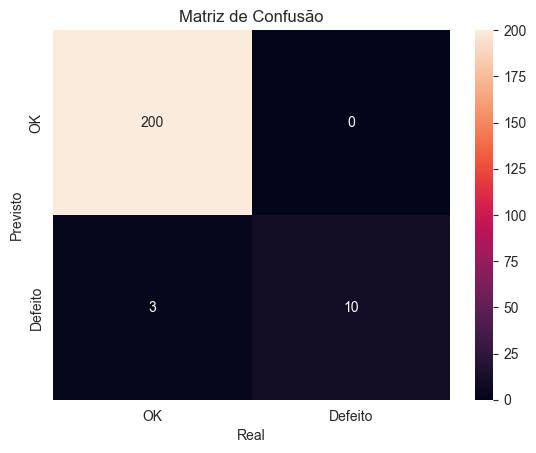

In [81]:
# treinar e avaliar o modelo
model = trainSVM(X_train, y_train, seed)
predict_and_evaluate(model, X_test, y_test)

Vamos testar agora com o modelo PCA os resultados

---
7) PCA

In [82]:
from sklearn.decomposition import PCA
pca = PCA().fit(X_train)
# somatório acumulado de cada uma das variâncias. Podemos ver em que componente principal a gente chegou a 100% da variância acumulada, por exemplo.
df = pd.DataFrame(pca.explained_variance_ratio_.cumsum())
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df)

            0
0    0.059503
1    0.097356
2    0.127889
3    0.154944
4    0.177359
5    0.198649
6    0.218830
7    0.238160
8    0.255188
9    0.271102
10   0.285917
11   0.300136
12   0.313982
13   0.327340
14   0.340317
15   0.352553
16   0.364716
17   0.376343
18   0.387590
19   0.398453
20   0.409251
21   0.419925
22   0.430159
23   0.440264
24   0.450202
25   0.460060
26   0.469399
27   0.478528
28   0.487588
29   0.496530
30   0.505374
31   0.513771
32   0.522081
33   0.530194
34   0.538259
35   0.546083
36   0.553787
37   0.561352
38   0.568816
39   0.576161
40   0.583424
41   0.590533
42   0.597492
43   0.604339
44   0.611094
45   0.617723
46   0.624222
47   0.630550
48   0.636840
49   0.642925
50   0.648927
51   0.654896
52   0.660735
53   0.666522
54   0.672245
55   0.677854
56   0.683401
57   0.688732
58   0.694028
59   0.699254
60   0.704406
61   0.709391
62   0.714356
63   0.719231
64   0.724038
65   0.728741
66   0.733332
67   0.737906
68   0.742365
69   0.746799
70   0

In [83]:
# 214, 430
cut = 430
X_train = pca.transform(X_train)
X_train = X_train[:, 0:cut]
X_train.shape

(1304, 430)

In [84]:
X_test = pca.transform(X_test)
X_test = X_test[:, 0:cut]
X_test.shape

(213, 430)

Acurácia:  0.9859154929577465
Kappa:  0.8622547962923044


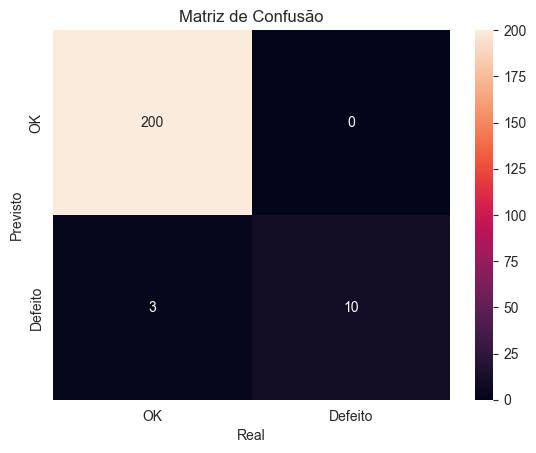

In [85]:
# treinar e avaliar o modelo
model = trainSVM(X_train, y_train, seed)
predict_and_evaluate(model, X_test, y_test)